In [1]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from pandas import read_csv
import numpy as np

dataframe = read_csv('weather@beijing_5years.csv', usecols = [6,7,8,10]) # TEMP 데이터 예측
print(dataframe)

dataset = dataframe.values
dataset = dataset.astype('float')
print(dataset)

print(dataset.shape)

       DEWP  TEMP    PRES     Iws
0       -21 -11.0  1021.0    1.79
1       -21 -12.0  1020.0    4.92
2       -21 -11.0  1019.0    6.71
3       -21 -14.0  1019.0    9.84
4       -20 -12.0  1018.0   12.97
...     ...   ...     ...     ...
43819   -23  -2.0  1034.0  231.97
43820   -22  -3.0  1034.0  237.78
43821   -22  -3.0  1034.0  242.70
43822   -22  -4.0  1034.0  246.72
43823   -21  -3.0  1034.0  249.85

[43824 rows x 4 columns]
[[ -21.    -11.   1021.      1.79]
 [ -21.    -12.   1020.      4.92]
 [ -21.    -11.   1019.      6.71]
 ...
 [ -22.     -3.   1034.    242.7 ]
 [ -22.     -4.   1034.    246.72]
 [ -21.     -3.   1034.    249.85]]
(43824, 4)


In [2]:
# The created dataset has 4 features per time step and 7 time steps
def create_dataset(dataset, look_back): # 4 columns in the dataset
    x_data = []
    y_data = []
    for i in range(len(dataset) - look_back):
        x_data_4 = []
        data_multi_0 = dataset[i:(i+look_back), 0]
        data_multi_1 = dataset[i:(i+look_back), 1]
        data_multi_2 = dataset[i:(i+look_back), 2]
        data_multi_3 = dataset[i:(i+look_back), 3]
        x_data_4.append(data_multi_0)
        x_data_4.append(data_multi_1)
        x_data_4.append(data_multi_2)
        x_data_4.append(data_multi_3)
        x_data.append(x_data_4)
        y_data.append(dataset[i+look_back, 1]) # TEMP 데이터 예측 (두번째 열)
    return np.array(x_data), np.array(y_data)

look_back = 7
x_dataset, y_dataset = create_dataset(dataset, look_back)

print(x_dataset.shape, y_dataset.shape)

print(x_dataset[:2]) # Get first 2 rows from the dataset
print(y_dataset)

(43817, 4, 7) (43817,)
[[[ -21.    -21.    -21.    -21.    -20.    -19.    -19.  ]
  [ -11.    -12.    -11.    -14.    -12.    -10.     -9.  ]
  [1021.   1020.   1019.   1019.   1018.   1017.   1017.  ]
  [   1.79    4.92    6.71    9.84   12.97   16.1    19.23]]

 [[ -21.    -21.    -21.    -20.    -19.    -19.    -19.  ]
  [ -12.    -11.    -14.    -12.    -10.     -9.     -9.  ]
  [1020.   1019.   1019.   1018.   1017.   1017.   1017.  ]
  [   4.92    6.71    9.84   12.97   16.1    19.23   21.02]]]
[-9. -9. -8. ... -3. -4. -3.]


In [3]:
# Create the model
model = Sequential()

# The input data has 7 time steps and 4 features per time step
model.add(LSTM(32, input_shape=(7, 4)))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

In [4]:
# Prepare the dataset in advance (dimentions in order and normalization)
train_data_x, test_data_x = train_test_split(x_dataset, test_size = 0.2, shuffle = False)
train_data_y, test_data_y = train_test_split(y_dataset, test_size = 0.2, shuffle = False)
print(len(train_data_x), len(test_data_x))
print(len(train_data_y), len(test_data_y))

print(train_data_x.shape, train_data_y.shape)

train_x = np.transpose(train_data_x, (0, 2, 1))
test_x = np.transpose(test_data_x, (0, 2, 1))

print(train_x[0:2]) # Get first 2 rows from the dataset
print(train_x.shape)

train_y = train_data_y
test_y = test_data_y

print(train_y)
print(train_y.shape)

35053 8764
35053 8764
(35053, 4, 7) (35053,)
[[[ -21.    -11.   1021.      1.79]
  [ -21.    -12.   1020.      4.92]
  [ -21.    -11.   1019.      6.71]
  [ -21.    -14.   1019.      9.84]
  [ -20.    -12.   1018.     12.97]
  [ -19.    -10.   1017.     16.1 ]
  [ -19.     -9.   1017.     19.23]]

 [[ -21.    -12.   1020.      4.92]
  [ -21.    -11.   1019.      6.71]
  [ -21.    -14.   1019.      9.84]
  [ -20.    -12.   1018.     12.97]
  [ -19.    -10.   1017.     16.1 ]
  [ -19.     -9.   1017.     19.23]
  [ -19.     -9.   1017.     21.02]]]
(35053, 7, 4)
[-9. -9. -8. ...  8.  8.  7.]
(35053,)


In [14]:
# Normalize features
scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

# ValueError: Found array with dim 3. MinMaxScaler expected <= 2.
nsamples, nx, ny = train_x.shape
train_x_2d = train_x.reshape((nsamples,nx*ny))
print(nsamples, nx, ny)

scaled_train_x_2d = scaler_x.fit_transform(train_x_2d)
print(scaled_train_x_2d[0])

scaled_train_x = scaled_train_x_2d.reshape((nsamples,nx,ny))
print(scaled_train_x[0])

nsamples, nx, ny = test_x.shape
test_x_2d = test_x.reshape((nsamples,nx*ny))
scaled_test_x_2d = scaler_x.fit_transform(test_x_2d)
scaled_test_x = scaled_test_x_2d.reshape((nsamples,nx,ny))
print(nsamples, nx, ny)

scaled_train_y = scaler_y.fit_transform(train_y.reshape(-1,1))
scaled_test_y = scaler_y.fit_transform(test_y.reshape(-1,1))

print(scaled_train_x[0])
print(scaled_train_x.shape)
print(scaled_train_y[0])
print(scaled_train_y.shape)

35053 7 4
[0.19672131 0.13333333 0.54545455 0.00229001 0.19672131 0.11666667
 0.52727273 0.00763907 0.19672131 0.13333333 0.50909091 0.01069811
 0.19672131 0.08333333 0.50909091 0.01604717 0.21311475 0.11666667
 0.49090909 0.02139622 0.2295082  0.15       0.47272727 0.02674528
 0.2295082  0.16666667 0.47272727 0.03209433]
[[0.19672131 0.13333333 0.54545455 0.00229001]
 [0.19672131 0.11666667 0.52727273 0.00763907]
 [0.19672131 0.13333333 0.50909091 0.01069811]
 [0.19672131 0.08333333 0.50909091 0.01604717]
 [0.21311475 0.11666667 0.49090909 0.02139622]
 [0.2295082  0.15       0.47272727 0.02674528]
 [0.2295082  0.16666667 0.47272727 0.03209433]]
8764 7 4
[[0.19672131 0.13333333 0.54545455 0.00229001]
 [0.19672131 0.11666667 0.52727273 0.00763907]
 [0.19672131 0.13333333 0.50909091 0.01069811]
 [0.19672131 0.08333333 0.50909091 0.01604717]
 [0.21311475 0.11666667 0.49090909 0.02139622]
 [0.2295082  0.15       0.47272727 0.02674528]
 [0.2295082  0.16666667 0.47272727 0.03209433]]
(35053,

In [15]:
# Train the model
history = model.fit(scaled_train_x, scaled_train_y, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
1096/1096 [==============================] - 5s 3ms/step - loss: 0.0059
Epoch 2/10
1096/1096 [==============================] - 3s 3ms/step - loss: 8.7483e-04
Epoch 3/10
1096/1096 [==============================] - 4s 3ms/step - loss: 6.4542e-04
Epoch 4/10
1096/1096 [==============================] - 4s 3ms/step - loss: 5.4895e-04
Epoch 5/10
1096/1096 [==============================] - 4s 3ms/step - loss: 5.2106e-04
Epoch 6/10
1096/1096 [==============================] - 3s 3ms/step - loss: 5.0187e-04
Epoch 7/10
1096/1096 [==============================] - 3s 3ms/step - loss: 4.9283e-04
Epoch 8/10
1096/1096 [==============================] - 3s 3ms/step - loss: 4.8513e-04
Epoch 9/10
1096/1096 [==============================] - 4s 4ms/step - loss: 4.8973e-04
Epoch 10/10
1096/1096 [==============================] - 4s 4ms/step - loss: 4.7848e-04


dict_keys(['loss'])


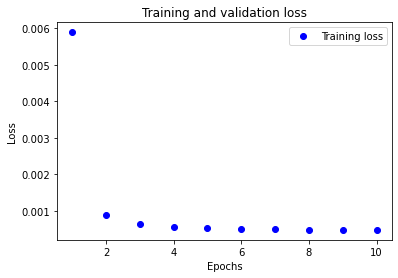

In [16]:
import matplotlib.pyplot as plt

print(history.history.keys())
loss = history.history['loss']
epochs = range(1, len(loss) + 1)

# bo = 파란색 점
plt.plot(epochs, loss, 'bo', label='Training loss') # plot x and y using blue circle markers
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [17]:
# Make predictions on the test data
predictions = model.predict(scaled_test_x)

print(predictions)

# invert normalized value
inverted_predictions = scaler_y.inverse_transform(predictions)
inverted_test_y = scaler_y.inverse_transform(scaled_test_y)

print(inverted_predictions)
print(inverted_test_y)

print(dataset[-3:]) # Get last 3 rows from the dataset

274/274 [==============================] - 1s 2ms/step
[[0.35472894]
 [0.3522119 ]
 [0.35561693]
 ...
 [0.17145626]
 [0.17160851]
 [0.15330662]]
[[ 6.510092 ]
 [ 6.371654 ]
 [ 6.558931 ]
 ...
 [-3.5699055]
 [-3.561532 ]
 [-4.5681357]]
[[ 7.]
 [ 7.]
 [ 6.]
 ...
 [-3.]
 [-4.]
 [-3.]]
[[ -22.     -3.   1034.    242.7 ]
 [ -22.     -4.   1034.    246.72]
 [ -21.     -3.   1034.    249.85]]


In [18]:
# Calculate the mean squared error of the predictions
scaled_mse_error = ((predictions - scaled_test_y) ** 2).mean()

print("(Scaled) Mean Squared Error:", scaled_mse_error)

# Calculate the mean squared error of the predictions
inverted_mse_error = ((inverted_predictions - inverted_test_y) ** 2).mean()

print("(Inverted) Mean Squared Error:", inverted_mse_error)

(Scaled) Mean Squared Error: 0.0005792221957050414
(Inverted) Mean Squared Error: 1.7521470930534757


In [19]:
# Calculate the accuracy for one sample of the test data
value_error = np.absolute(inverted_predictions[0] - inverted_test_y[0])

# Wrong method to apply for the temperature
value_percent = 100 - (value_error * 100 / inverted_test_y[0])

print(value_error, "error,", value_percent, "% accuracy")

[0.48990822] error, [93.00131117] % accuracy
